In [1]:
import  matplotlib.pyplot as plt  
import  numpy as np
import math
from gurobipy import *
import random

In [2]:
direccion=r"C:\Users\PC\OneDrive - Universidad de la Sabana\MDGP\Combined Job-Shop and VRP\Instances example\Sfjs01.txt"
#direccion="/Users\Asus\Dropbox\Instancias\edata\ela02.fjs"
instanciaFJS = open(direccion)
contador=0
contadorPedidos=0
pedidos=[]
maquinas=[]
operacionesxpedido=[]
TPA={}
numeroPedidos=0
numeroMaquinas=0
for  line in instanciaFJS:
    linea= line.split()
    if(contador==0):
        numeroPedidos=int(linea[0])
        numeroMaquinas=int(linea[1])
        maquinas=range(numeroMaquinas)
        pedidos=range(1,numeroPedidos+1)
        dicInitial= {}
        for m in range(numeroMaquinas):
            dicInitial[m]=0
        TPA[(0,0)]=dicInitial
    else:
        print(linea)
        numeroOperacionesPedido= int(linea[0])
        operacionesxpedido.append(numeroOperacionesPedido)
        contadorElementoLista=1
        for operacion in range(numeroOperacionesPedido):
            Maquinas= int(linea[contadorElementoLista])
            MachinesTime={}
            for maquina in range(Maquinas):
                maquina= int(linea[contadorElementoLista+1])-1
                tiempo= int(linea[contadorElementoLista+2])
                contadorElementoLista=contadorElementoLista+2
                MachinesTime[maquina]=tiempo
            contadorElementoLista=contadorElementoLista+1
            TPA[(contadorPedidos+1,operacion+1)]= MachinesTime
        contadorPedidos= contadorPedidos+1
    contador=contador+1
print(pedidos)

['3', '2', '2', '94', '1', '113', '1', '1', '72', '2', '2', '91', '1', '80']
['3', '3', '2', '86', '1', '116', '3', '74', '3', '1', '115', '2', '108', '3', '79', '1', '1', '102']
['3', '1', '1', '109', '1', '1', '109', '3', '2', '109', '1', '74', '3', '115']
['3', '2', '2', '108', '1', '116', '1', '1', '84', '1', '1', '88']
range(1, 5)


In [3]:
PM={}
TP={}
for i,j in TPA:
    arreglo={}
    ar2={}
    for machine in maquinas:
        bol= False
        for maquina in TPA[i,j]:
            if(machine==maquina):
                bol= True
        if(bol==True):
            arreglo[machine]=1
            ar2[machine]=TPA[i,j][machine]
        else:
            arreglo[machine]=0
            ar2[machine]=0
    PM[(i,j)]=arreglo
    TP[(i,j)]=ar2
print(TPA)
arcos=[(m,i,j,k,l) for m in maquinas for i,j in TPA for k,l in TPA ]

{(0, 0): {0: 0, 1: 0, 2: 0}, (1, 1): {1: 94, 0: 113}, (1, 2): {0: 72}, (1, 3): {1: 91, 0: 80}, (2, 1): {1: 86, 0: 116, 2: 74}, (2, 2): {0: 115, 1: 108, 2: 79}, (2, 3): {0: 102}, (3, 1): {0: 109}, (3, 2): {0: 109}, (3, 3): {1: 109, 0: 74, 2: 115}, (4, 1): {1: 108, 0: 116}, (4, 2): {0: 84}, (4, 3): {0: 88}}


setup={}
for m in range(numeroMaquinas):
    for i in range(1+numeroPedidos):
        for j in range(1+numeroPedidos):
            if(i!=j):
                setup[(m,i,j)]= random.randint(5, 10)
            else:
                setup[(m,i,j)]=0
setupM={}
start={}
for m in range(numeroMaquinas):
    for i in range(numeroPedidos+1):
        setupM[m,i]= random.randint(5, 10)
        
for m in range(numeroMaquinas):
    for i in range(numeroPedidos+1):
        start[m,i]= random.randint(5, 10)
print(setup)

In [4]:
direccion2=r"C:\Users\PC\Desktop\Nueva carpeta (2)\Sfjs1.txt"
instanciaSetup = open(direccion2)
contadorMaquinas=-1
contadorLineas=0
setup={}
start={}
setupM={}
frecuencia={}
duracion={}
for  linea in instanciaSetup:
    line= linea.split()
    if(contadorLineas==0):
        contadorMaquinas=contadorMaquinas+1
        contadorLineas=contadorLineas+1
        frecuencia[contadorMaquinas]=int(line[0])
        duracion[contadorMaquinas]=int(line[1])
        
    else:
        if(line[0]=='-'):
            contadorLineas=0
            m=contadorMaquinas
            setup[(m,0,0)]=0
            start[(m,0)]=0
            setupM[(m,0)]=0
        else:
            m=contadorMaquinas
            i=contadorLineas
            if(i<numeroPedidos+1):
                setupM[(m,i)]= int(line[numeroPedidos])
            for j in range(numeroPedidos):
                if(contadorLineas<=numeroPedidos):
                    setup[m,i,j+1]=int(line[j])
                else:
                    start[(m,j+1)]=int(line[j])
            contadorLineas=contadorLineas+1

print(setup)

{(0, 1, 1): 0, (0, 1, 2): 6, (0, 1, 3): 9, (0, 1, 4): 7, (0, 2, 1): 5, (0, 2, 2): 0, (0, 2, 3): 8, (0, 2, 4): 7, (0, 3, 1): 10, (0, 3, 2): 8, (0, 3, 3): 0, (0, 3, 4): 5, (0, 4, 1): 10, (0, 4, 2): 9, (0, 4, 3): 9, (0, 4, 4): 0, (0, 0, 0): 0, (1, 1, 1): 0, (1, 1, 2): 8, (1, 1, 3): 8, (1, 1, 4): 7, (1, 2, 1): 8, (1, 2, 2): 0, (1, 2, 3): 9, (1, 2, 4): 6, (1, 3, 1): 5, (1, 3, 2): 6, (1, 3, 3): 0, (1, 3, 4): 7, (1, 4, 1): 9, (1, 4, 2): 10, (1, 4, 3): 9, (1, 4, 4): 0, (1, 0, 0): 0, (2, 1, 1): 0, (2, 1, 2): 9, (2, 1, 3): 8, (2, 1, 4): 8, (2, 2, 1): 9, (2, 2, 2): 0, (2, 2, 3): 7, (2, 2, 4): 5, (2, 3, 1): 7, (2, 3, 2): 5, (2, 3, 3): 0, (2, 3, 4): 6, (2, 4, 1): 7, (2, 4, 2): 9, (2, 4, 3): 8, (2, 4, 4): 0, (2, 0, 0): 0}


In [5]:
model = Model('FJSP')
# Variables
x= model.addVars(arcos, vtype= GRB.BINARY, name='x')
xm= model.addVars(arcos, vtype= GRB.BINARY, name='xm')
sk= model.addVars([k for k in maquinas],vtype=GRB.INTEGER, name='sk')
P=model.addVars([(i,j) for i,j in TPA],vtype= GRB.INTEGER, name='P')
SM=model.addVars([(i,j,k) for i,j in TPA for k in maquinas],vtype= GRB.BINARY, name='Sm')
IT=model.addVars([(i,j) for i,j in TPA],vtype= GRB.INTEGER, name='IT')
TM=model.addVars([(m,i,j) for m in maquinas for i,j in TPA], name= 'TM')
TA=model.addVars([(m,i,j) for m in maquinas for i,j in TPA], name= 'TA')
BM=model.addVars([(i,j)  for i,j in TPA], name= 'BM')
ST=model.addVars([(m,i,j) for m in maquinas for i,j in TPA], name= 'TA')
ym = model.addVar(vtype=GRB.INTEGER, name= 'makespan')

Set parameter Username
Academic license - for non-commercial use only - expires 2024-02-02


In [6]:
print(TPA)

{(0, 0): {0: 0, 1: 0, 2: 0}, (1, 1): {1: 94, 0: 113}, (1, 2): {0: 72}, (1, 3): {1: 91, 0: 80}, (2, 1): {1: 86, 0: 116, 2: 74}, (2, 2): {0: 115, 1: 108, 2: 79}, (2, 3): {0: 102}, (3, 1): {0: 109}, (3, 2): {0: 109}, (3, 3): {1: 109, 0: 74, 2: 115}, (4, 1): {1: 108, 0: 116}, (4, 2): {0: 84}, (4, 3): {0: 88}}


In [7]:
model.addConstrs(quicksum(SM[i,j,m] for m in maquinas)==1 for i,j in TPA if i>0)
model.addConstrs(PM[i,j][m]>= SM[i,j,m] for i,j in TPA for m in maquinas if i>0)

model.addConstrs((SM[i,j,k]==1) >> (P[i,j]==TP[i,j][k]) for i, j in TP for k in maquinas)
#model.addConstrs((P[i,j]>=TP[i,j][k]*SM[i,j,k]) for i, j in TP for k in maquinas)

model.addConstrs(IT[i,j]+P[i,j]<=IT[i,j+1] for i,j in TPA if(i>0) and (j<operacionesxpedido[i-1]))
model.addConstrs(SM[i,j,m]>=x[m,i,j,k,l]for m,i,j,k,l in arcos)


model.addConstrs(quicksum(x[m,i,j,k,l] for k,l in TPA if(k,l)!=(i,j))==SM[i,j,m] for m in maquinas for i,j in TPA if(i>0))
model.addConstrs(quicksum(x[m,i,j,k,l] for i,j in TPA if(k,l)!=(i,j))==SM[k,l,m] for m in maquinas for k,l in TPA if(k>0))

model.addConstrs(quicksum(x[m,0,0,k,l] for k,l in TPA)==1 for m in maquinas)
model.addConstrs(quicksum(x[m,i,j,0,0] for i,j in TPA)==1 for m in maquinas)

#model.addConstrs((x[m,i,j,k,l]==1) >>(TM[m,k,l]>=TM[m,i,j] +P[i,j]+setup[m,i,k]) for m in maquinas for i,j in TPA for k,l in TPA if(k,l)!=(0,0))
model.addConstrs((x[m,i,j,k,l]==1) >>(TM[m,i,j]>=IT[i,j]) for m in maquinas for i,j in TPA for k,l in TPA)
model.addConstrs((x[m,i,j,k,l]==1) >>(IT[i,j]>=TM[m,i,j]) for m in maquinas for i,j in TPA for k,l in TPA)

Ci=model.addVars([(i) for i in range(numeroPedidos)],vtype=GRB.INTEGER)
model.addConstrs(Ci[i]==IT[i+1,operacionesxpedido[i]]+P[i+1,operacionesxpedido[i]] for i in range(numeroPedidos))
model.addConstrs(ym>=IT[i+1,operacionesxpedido[i]]+P[i+1,operacionesxpedido[i]]for i in range(numeroPedidos))

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>}

In [8]:
model.addConstrs(x[m,i,j,k,l]>=xm[m,i,j,k,l] for m in maquinas for i,j in TPA for k,l in TPA)
model.addConstrs(TA[m,k,l]>= TA[m,i,j] +P[k,l]-100000*(1-x[m,i,j,k,l]) -100000*(xm[m,i,j,k,l]) for m in maquinas for i,j in TPA for k,l in TPA)
model.addConstrs(TA[m,i,j]<=frecuencia[m]   for i,j in TPA for m in maquinas)

model.addConstrs(TM[m,k,l]>=TM[m,i,j] +P[i,j]+setupM[m,i]+duracion[m]+start[m,k] -100000*(1-xm[m,i,j,k,l]) for m in maquinas for i,j in TPA for k,l in TPA if(i,j)!=(0,0))
model.addConstrs(TM[m,k,l]>=TM[m,i,j] +P[i,j] +setup[m,i,k] -100000*(1-x[m,i,j,k,l])-100000*xm[m,i,j,k,l] for m in maquinas for i,j in TPA for k,l in TPA if(i,j)!=(0,0) and (k,l)!=(0,0) )

model.addConstrs(TM[m,k,l]>=start[m,k] -100000*(1-x[m,0,0,k,l]) for m in maquinas  for k,l in TPA)


model.addConstrs(TA[m,k,l]>=P[k,l]-100000*(1-xm[m,i,j,k,l])  for m in maquinas for i,j in TPA for k,l in TPA)


{(0, 0, 0, 0, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 0, 1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 0, 1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 0, 1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 0, 2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 0, 2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 0, 2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 0, 3, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 0, 3, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 0, 3, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 0, 4, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 0, 4, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 0, 0, 4, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 1, 0, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 1, 1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 1, 1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1, 1, 1, 3): <gurobi.Constr *Awaiting Model Update*

In [9]:
start

{(0, 1): 7,
 (0, 2): 5,
 (0, 3): 10,
 (0, 4): 8,
 (0, 0): 0,
 (1, 1): 8,
 (1, 2): 10,
 (1, 3): 9,
 (1, 4): 9,
 (1, 0): 0,
 (2, 1): 7,
 (2, 2): 9,
 (2, 3): 10,
 (2, 4): 8,
 (2, 0): 0}

In [10]:
print(setup)

{(0, 1, 1): 0, (0, 1, 2): 6, (0, 1, 3): 9, (0, 1, 4): 7, (0, 2, 1): 5, (0, 2, 2): 0, (0, 2, 3): 8, (0, 2, 4): 7, (0, 3, 1): 10, (0, 3, 2): 8, (0, 3, 3): 0, (0, 3, 4): 5, (0, 4, 1): 10, (0, 4, 2): 9, (0, 4, 3): 9, (0, 4, 4): 0, (0, 0, 0): 0, (1, 1, 1): 0, (1, 1, 2): 8, (1, 1, 3): 8, (1, 1, 4): 7, (1, 2, 1): 8, (1, 2, 2): 0, (1, 2, 3): 9, (1, 2, 4): 6, (1, 3, 1): 5, (1, 3, 2): 6, (1, 3, 3): 0, (1, 3, 4): 7, (1, 4, 1): 9, (1, 4, 2): 10, (1, 4, 3): 9, (1, 4, 4): 0, (1, 0, 0): 0, (2, 1, 1): 0, (2, 1, 2): 9, (2, 1, 3): 8, (2, 1, 4): 8, (2, 2, 1): 9, (2, 2, 2): 0, (2, 2, 3): 7, (2, 2, 4): 5, (2, 3, 1): 7, (2, 3, 2): 5, (2, 3, 3): 0, (2, 3, 4): 6, (2, 4, 1): 7, (2, 4, 2): 9, (2, 4, 3): 8, (2, 4, 4): 0, (2, 0, 0): 0}


In [11]:
model.setObjective(ym,GRB.MINIMIZE)
model.Params.timeLimit=60
model.optimize()

Set parameter TimeLimit to value 60
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 3148 rows, 1217 columns and 11145 nonzeros
Model fingerprint: 0xba689a4c
Model has 1053 general constraints
Variable types: 130 continuous, 1087 integer (1053 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+05]
  GenCon rhs range [7e+01, 1e+02]
  GenCon coe range [1e+00, 1e+00]
Presolve removed 1578 rows and 321 columns
Presolve time: 0.08s
Presolved: 1570 rows, 896 columns, 5197 nonzeros
Presolved model has 426 SOS constraint(s)
Variable types: 489 continuous, 407 integer (390 binary)

Root relaxation: objective 2.920000e+02, 338 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current

In [12]:
print(IT)

{(0, 0): <gurobi.Var IT[0,0] (value 200.0)>, (1, 1): <gurobi.Var IT[1,1] (value 104.0)>, (1, 2): <gurobi.Var IT[1,2] (value 388.0)>, (1, 3): <gurobi.Var IT[1,3] (value 468.0)>, (2, 1): <gurobi.Var IT[2,1] (value 10.0)>, (2, 2): <gurobi.Var IT[2,2] (value 96.0)>, (2, 3): <gurobi.Var IT[2,3] (value 281.0)>, (3, 1): <gurobi.Var IT[3,1] (value 10.0)>, (3, 2): <gurobi.Var IT[3,2] (value 148.0)>, (3, 3): <gurobi.Var IT[3,3] (value 356.0)>, (4, 1): <gurobi.Var IT[4,1] (value 226.0)>, (4, 2): <gurobi.Var IT[4,2] (value 485.0)>, (4, 3): <gurobi.Var IT[4,3] (value 569.0)>}


In [13]:
print(Ci)

{0: <gurobi.Var C1213 (value 559.0)>, 1: <gurobi.Var C1214 (value 383.0)>, 2: <gurobi.Var C1215 (value 471.0)>, 3: <gurobi.Var C1216 (value 657.0)>}


In [14]:
print(len(operacionesxpedido))

4


In [15]:
for i in range(numeroPedidos):
    print(operacionesxpedido[i])

3
3
3
3


In [16]:
for m in maquinas:
    Linea='Machine '+str(m)+':'
    initial = (0,0)
    follow=(0,0)
    Continuar=True
    while(Continuar):
        initial=follow
        for k,l in TPA:
            i=initial[0]
            j=initial[1]
            if (x[m,i,j,k,l].x>0.99):
                final=abs(IT[i,j].x+P[i,j].x)
                if(initial!=(0,0)):
                    Linea=Linea+ '('+str(i)+'-'+str(j)+')'+'('+str(abs(IT[i,j].x))+'-'+str(final)+') '
                follow=(k,l)
        if(follow==(0,0)):
            Continuar=False
    print(Linea)


Machine 0:(3-1)(10.0-119.0) (3-2)(148.0-257.0) (2-3)(281.0-383.0) (1-2)(388.0-460.0) (4-2)(485.0-569.0) (4-3)(569.0-657.0) 
Machine 1:(2-1)(10.0-96.0) (1-1)(104.0-198.0) (4-1)(226.0-334.0) (1-3)(468.0-559.0) 
Machine 2:(2-2)(96.0-175.0) (3-3)(356.0-471.0) 


In [17]:
for m in maquinas:
    Linea='Machine '+str(m)+':'
    initial = (0,0)
    follow=(0,0)
    Continuar=True
    while(Continuar):
        initial=follow
        for k,l in TPA:
            i=initial[0]
            j=initial[1]
            a=False
            if (x[m,i,j,k,l].x>0.99):
                if(xm[m,i,j,k,l].x>0.99):
                    a=True
                final=abs(P[k,l].x)
                Linea=Linea+ '('+str(i)+'-'+str(j)+ '->'+str(k)+'-'+str(l)+')'
                Linea=Linea+ '(P'+str(k)+str(l)+':'+str(round(final))+')'
                Linea=Linea+ '(' +str(a)+'-A'+str(k)+str(l)+':'+str(round(TA[m,k,l].x))+')-|'
                follow=(k,l)
        if(follow==(0,0)):
            Continuar=False
    print(Linea)

Machine 0:(0-0->3-1)(P31:109)(True-A31:178)-|(3-1->3-2)(P32:109)(True-A32:109)-|(3-2->2-3)(P23:102)(True-A23:102)-|(2-3->1-2)(P12:72)(False-A12:174)-|(1-2->4-2)(P42:84)(True-A42:84)-|(4-2->4-3)(P43:88)(False-A43:172)-|(4-3->0-0)(P00:0)(False-A00:172)-|
Machine 1:(0-0->2-1)(P21:86)(True-A21:86)-|(2-1->1-1)(P11:94)(False-A11:180)-|(1-1->4-1)(P41:108)(True-A41:108)-|(4-1->1-3)(P13:91)(True-A13:91)-|(1-3->0-0)(P00:0)(False-A00:91)-|
Machine 2:(0-0->2-2)(P22:79)(True-A22:79)-|(2-2->3-3)(P33:115)(False-A33:194)-|(3-3->0-0)(P00:0)(False-A00:194)-|


In [18]:
for m in maquinas:
    Linea='Machine: '+str(m+1)+'>>-'
    initial = (0,0)
    follow=(0,0)
    Continuar=True
    while(Continuar):
        initial=follow
        for k,l in TPA:
            i=initial[0]
            j=initial[1]
            a=False
            if (x[m,i,j,k,l].x>0.99):
                if(xm[m,i,j,k,l].x>0.99 and k>0):
                    a=True
                if (i>0):
                    final=abs(P[i,j].x)
                    Linea=Linea +'('+str(i)+'-'+str(j)+')'
                    if(k==0):
                        Linea=Linea+ '('+str(round(IT[i,j].x))+'-'+str(round(IT[i,j].x+final))+')'
                    else:
                        Linea=Linea+ '('+str(round(IT[i,j].x))+'-'+str(round(IT[i,j].x+final))+')-'
                    if(i!=0):
                        if(a):
                            Linea=Linea+'(S)('+str(setupM[m,i])+ ')-(M)('+str(round(duracion[m]))+')-(S)('+str(start[m,k])+')'
                        else:
                            if(k!=0):
                                Linea=Linea+'(S)('+str(setup[m,i,k])+ ')'
                    else:
                        Linea=Linea+'(S)('+str(start[m,k])+')'
                else:
                    Linea=Linea+'(S)('+str(start[m,k])+')'
                follow=(k,l)
        if(follow==(0,0)):
            Continuar=False
    print(Linea)

Machine: 1>>-(S)(10)(3-1)(10-119)-(S)(7)-(M)(12)-(S)(10)(3-2)(148-257)-(S)(7)-(M)(12)-(S)(5)(2-3)(281-383)-(S)(5)(1-2)(388-460)-(S)(5)-(M)(12)-(S)(8)(4-2)(485-569)-(S)(0)(4-3)(569-657)
Machine: 2>>-(S)(10)(2-1)(10-96)-(S)(8)(1-1)(104-198)-(S)(5)-(M)(14)-(S)(9)(4-1)(226-334)-(S)(6)-(M)(14)-(S)(8)(1-3)(468-559)
Machine: 3>>-(S)(9)(2-2)(96-175)-(S)(7)(3-3)(356-471)


In [19]:
IT[4,2]

<gurobi.Var IT[4,2] (value 485.0)>

In [20]:
ListaCadena=[]
for m in maquinas:
    Linea='Machine: '+str(m+1)+'>>'
    initial = (0,0)
    follow=(0,0)
    Continuar=True
    while(Continuar):
        initial=follow
        for k,l in TPA:
            i=initial[0]
            j=initial[1]
            a=False
            if (x[m,i,j,k,l].x>0.99):
                if(xm[m,i,j,k,l].x>0.99 and k>0):
                    a=True
                if (i>0):
                    final=abs(P[i,j].x)
                    Linea=Linea +'-('+str(i)+'-'+str(j)+')'
                    if(k==0):
                        Linea=Linea+ '('+str(round(IT[i,j].x))+'-'+str(round(IT[i,j].x+final))+')'
                    else:
                        Linea=Linea+ '('+str(round(IT[i,j].x))+'-'+str(round(IT[i,j].x+final))+')'
                    if(i!=0):
                        if(a):
                            Linea=Linea+'-(S-'+str(i)+'-M'+')('+str(round(IT[i,j].x+abs(P[i,j].x)))+'-'+str(round(IT[i,j].x+abs(P[i,j].x)+setupM[m,i]))+ ')-(M-'+str(i)+'-'+str(j)+')('+str(round(IT[i,j].x+abs(P[i,j].x)+setupM[m,i]))+'-'+str(round(IT[i,j].x+abs(P[i,j].x)+setupM[m,i]+duracion[m]))+')-(S-M-'+str(k)+')('+str(round(IT[i,j].x+abs(P[i,j].x)+setupM[m,i]+duracion[m]))+'-'+str(round(IT[i,j].x+abs(P[i,j].x)+setupM[m,i]+duracion[m]+start[m,k]))+')'
                        else:
                            if(k!=0):
                                Linea=Linea+'-(S-'+str(i)+'-'+str(k)+')('+str(round(IT[i,j].x+abs(P[i,j].x)))+'-'+str(round(IT[i,j].x+abs(P[i,j].x)+setup[m,i,k]))+ ')'
                    else:
                        Linea=Linea+'-(S-'+str(i)+'-'+str(k)+')('+str(start[m,k])+')'
                else:
                    Linea=Linea+'-(S-0-'+str(k)+')('+str(0)+'-'+str(start[m,k])+')'
                follow=(k,l)
        if(follow==(0,0)):
            Continuar=False
    ListaCadena.append(Linea)
print(ListaCadena[2])

Machine: 3>>-(S-0-2)(0-9)-(2-2)(96-175)-(S-2-3)(175-182)-(3-3)(356-471)


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import random

def crear_gantt(maquinas, ht):
    # Parámetros:
    hbar = 10
    tticks = 10
    nmaq = len(maquinas)
  
    plt.figure(figsize=(10,10))
    # Creación de los objetos del plot:
    fig, gantt = plt.subplots()
    

    # Diccionario con parámetros:
    diagrama = {
        "fig": fig,
        "ax": gantt,
        "hbar": hbar,
        "tticks": tticks,
        "maquinas": maquinas,
        "ht": ht
    }
    size=nmaq
    fig.set_figheight(size*2)
    fig.set_figwidth(size*5.5)

    # Etiquetas de los ejes:
    gantt.set_xlabel("Time",fontsize=15)
    gantt.set_ylabel("Resources",fontsize=15)

    # Límites de los ejes:
    gantt.set_xlim(0, ht)
    gantt.set_ylim(0, nmaq*hbar)

    # Divisiones del eje de tiempo:
    gantt.set_xticks(range(0, ht, 10), minor=True)
    #gantt.grid(True, axis='x')

    # Divisiones del eje de máquinas:
    gantt.set_yticks(range(hbar, nmaq*hbar, hbar), minor=True)
    #gantt.grid(True, axis='y', which='minor')

    # Etiquetas de máquinas:
    gantt.set_yticks(np.arange(hbar/2, hbar*nmaq - hbar/2 + hbar,
                            hbar))
    vc=[]
    for i in maquinas:
        if(i[0]=='M'):
            a=i.replace("M","")
            st='$M_{'+str(a)+'}$'
            vc.append(st)
        elif(i[0]=='P'):
            a=i.replace("P","")
            st='$J_{'+str(a)+'}$'
            vc.append(st)
        else:
            a=i.replace("V","")
            st='$V_{'+str(a)+'}$'
            vc.append(st)
    gantt.set_yticklabels(vc)

    return diagrama

# Función para armar tareas:
def agregar_tarea(diagrama, t0, d, maq, nombre, color, lb):
    maquinas = diagrama["maquinas"]
    hbar = diagrama["hbar"]
    gantt = diagrama["ax"]
    ht = diagrama["ht"]

    # Chequeos:
    assert t0 + d <= ht, "La tarea debe ser menor al horizonte temporal."
    assert t0 >= 0, "El t0 no puede ser negativo."
    assert d >= 0, "La duración d debe ser positiva."

    # Color:
    if color == None:
        #color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])]
        color= selectcolor()

    # Índice de la máquina:
    imaq = maquinas.index(maq)
    # Posición de la barra:
    gantt.broken_barh([(t0, d)], (hbar*imaq+hbar/4-0.5, hbar/2+1),
                      facecolors=(color), label=lb)
    # Posición del texto:
    if(d<120):
      gantt.text(x=(t0 + d/2), y=(hbar*imaq + hbar/2),
                    s=f"{nombre}({t0}-{t0+d})", va='center', ha='center', color='Black',size=7,rotation=90)
      #gantt.text(x=(t0 + d/2 +15), y=(hbar*imaq + hbar/2),
           #         s=f"({t0}-{t0+d})", va='center', ha='center', color='Black',size=16,rotation=90)
    else:
      gantt.text(x=(t0 + d/2), y=(hbar*imaq + hbar/2),
                    s=f"{nombre}({t0}-{t0+d})", va='center', ha='center', color='Black',size=7,rotation=90)
      #gantt.text(x=(t0 + d/2), y=(hbar*imaq + hbar/2-1.5),
                   # s=f"({t0}-{t0+d})", va='center', ha='center', color='Black',size=16)
    #lg=plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=50)
    

def mostrar():
    lg=plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',fontsize=12)
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize=12)
    plt.savefig('Route intance1.pdf', dpi=2000, 
                bbox_inches='tight')
    plt.show()    


In [22]:
operations={}
def cadenaCaracteres(cadena, Machine):
    print(cadena)
    cadena=cadena.replace(">>",")")
    ca=cadena.split(')-(')
    subMachine=ca[0].split(': ')
    for i in range(1,len(ca)):
        a=ca[i]
        b=a.split(')(')
        b[1]=b[1].replace(",00","")
        b[1]=b[1].replace("-",",")
        final=[]
        final.append(b[0])
        tiempos=b[1].split(',')
        if(tiempos[0]==''):
            tiempos[0]=0
        operations[b[0]+','+str(i)+str(Machine)]={'Machine':'M'+str(Machine),'Start':int(tiempos[0]),'End': int(tiempos[1].replace(")",""))}
    return str(Machine)

Machine: 1>>-(S-0-3)(0-10)-(3-1)(10-119)-(S-3-M)(119-126)-(M-3-1)(126-138)-(S-M-3)(138-148)-(3-2)(148-257)-(S-3-M)(257-264)-(M-3-2)(264-276)-(S-M-2)(276-281)-(2-3)(281-383)-(S-2-1)(383-388)-(1-2)(388-460)-(S-1-M)(460-465)-(M-1-2)(465-477)-(S-M-4)(477-485)-(4-2)(485-569)-(S-4-4)(569-569)-(4-3)(569-657)
Machine: 2>>-(S-0-2)(0-10)-(2-1)(10-96)-(S-2-1)(96-104)-(1-1)(104-198)-(S-1-M)(198-203)-(M-1-1)(203-217)-(S-M-4)(217-226)-(4-1)(226-334)-(S-4-M)(334-340)-(M-4-1)(340-354)-(S-M-1)(354-362)-(1-3)(468-559)
Machine: 3>>-(S-0-2)(0-9)-(2-2)(96-175)-(S-2-3)(175-182)-(3-3)(356-471)


<Figure size 1000x1000 with 0 Axes>

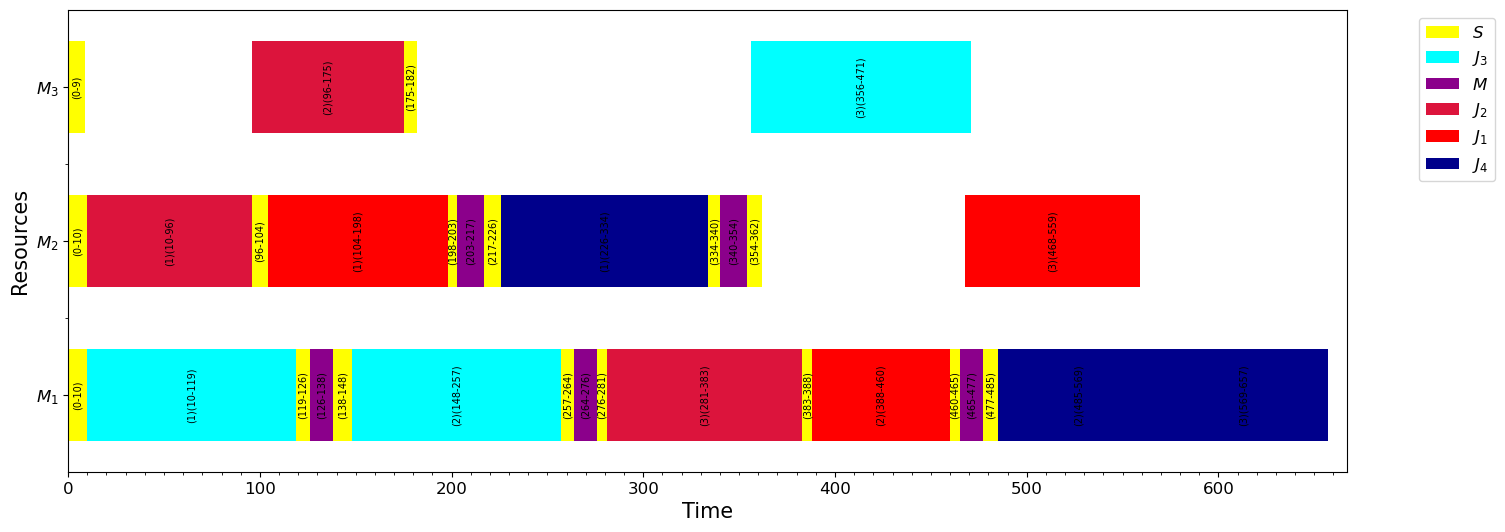

In [26]:
machines = []
ht=int(ym.x)+10
cm=1
for cadena in ListaCadena:
    machines.append('M'+cadenaCaracteres(cadena,Machine=cm))
    cm=cm+1
diagrama= crear_gantt(maquinas=machines,ht=ht)
color={'1':'r','2':'#DC143C','3':'#00FFFF','4':'#00008B','5':'#008B8B','6':'#B8860B','7':'#006400','8':'#8B008B','9':'#FF8C00','10':'#FFD700','11':'#ADFF2F','S':'#FFFF00','M':'#8B008B'}
valoresB={'1':False,'2':False,'3':False,'4':False,'5':False,'6':False,'7':False,'8':False,'9':False,'10':False,'11':False,'S':False,'M':False}
for operation in operations:
    a=operation.split('-')[0]
    op=operations.get(operation)
    label='_'+a
    if(valoresB[a]==False):
        label=a
        if(label!='S' and label!='M'):
            label='$J_'+str(a)+'$'
        else:
            label='$'+a+'$'
        valoresB[a]=True
        
    name=operation.split(',')[0]
    if(operation.split(',')[0].split('-')[0]=='M' or operation.split(',')[0].split('-')[0]=='S'):
        name=''
        if(operation=='S-M-1,13'):
            print(op['End']-op['Start'])
            print(op['Machine'])
            agregar_tarea(diagrama,op['Start'], op['End']-op['Start'], op['Machine'], name,'r',label)
    else: 
        name='('+name.split('-')[1]+')'
    if(op['End']-op['Start']>0):
        agregar_tarea(diagrama,op['Start'], op['End']-op['Start'], op['Machine'], name,color[a],label)
mostrar()